<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Gleb/gleb_notebook/Gleb_notebook_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>padding</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>3</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>26*26</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>26*26</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>9</th>
    <th>24*24</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>9</th>
    <th>24*24</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>2</th>
    <th>average pooling</th>
    <th>9</th>
    <th>12*12</th>
    <th>2*2</th>
    <th>2</th>
    <th>2</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>12</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>4</th>
    <th>average pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>5</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>6</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>10</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizer: SGD, Adam, Adagrad, RMSprop, Rprop

learning rate: 0.001, 0.005, 0.0001, 0.0005

batch size: 560

epoch number: 100

#Preparing Stage

In [1]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np
import scipy.stats as stats
import plotly.graph_objs as go


In [2]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36544, done.
remote: Counting objects: 100% (12904/12904), done.
remote: Compressing objects: 100% (12735/12735), done.
remote: Total 36544 (delta 219), reused 12805 (delta 160), pack-reused 23640
Receiving objects: 100% (36544/36544), 129.76 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (504/504), done.


In [3]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:04<00:00, 121266130.13it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


#Lenets

In [4]:
class LeNet(torch.nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.batn1 = torch.nn.BatchNorm2d(3)
    self.act1 = torch.nn.ReLU6()
    self.drop1 = torch.nn.Dropout(p = 0.1)

    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.batn2 = torch.nn.BatchNorm2d(6)
    self.act2 = torch.nn.ReLU6()
    self.drop2 = torch.nn.Dropout(p = 0.1)

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.batn3 = torch.nn.BatchNorm2d(6)
    self.act3 = torch.nn.ReLU6()
    self.drop3 = torch.nn.Dropout(p = 0.1)

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.batn4 = torch.nn.BatchNorm2d(9)
    self.act4 = torch.nn.ReLU6()
    self.drop4 = torch.nn.Dropout(p = 0.1)

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.batn5 = torch.nn.BatchNorm2d(9)
    self.act5 = torch.nn.ReLU6()
    self.drop5 = torch.nn.Dropout(p = 0.1)

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = torch.nn.ReLU6()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.batn6 = torch.nn.BatchNorm2d(12)
    self.act7 = torch.nn.ReLU6()
    self.drop6 = torch.nn.Dropout(p = 0.1)

    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.batn7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()
    self.drop7 = torch.nn.Dropout(p = 0.1)

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.batn8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()
    self.drop8 = torch.nn.Dropout(p = 0.1)

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.batn9 = torch.nn.BatchNorm2d(16)
    self.act10 = torch.nn.ReLU6()
    self.drop9 = torch.nn.Dropout(p = 0.1)

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batn1(x)
    x = self.act1(x)
    x = self.drop1(x)

    x = self.conv2(x)
    x = self.batn2(x)
    x = self.act2(x)
    x = self.drop2(x)

    x = self.conv3(x)
    x = self.batn3(x)
    x = self.act3(x)
    x = self.drop3(x)

    x = self.conv4(x)
    x = self.batn4(x)
    x = self.act4(x)
    x = self.drop4(x)

    x = self.conv5(x)
    x = self.batn5(x)
    x = self.act5(x)
    x = self.drop5(x)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.batn6(x)
    x = self.act7(x)
    x = self.drop6(x)

    x = self.conv7(x)
    x = self.batn7(x)
    x = self.act8(x)
    x = self.drop7(x)

    x = self.conv8(x)
    x = self.batn8(x)
    x = self.act9(x)
    x = self.drop8(x)

    x = self.conv9(x)
    x = self.batn9(x)
    x = self.act10(x)
    x = self.drop9(x)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

#**Training on each of optimizer on 100 epoches for each learning speed. Preparing exploration**

#SGD full skip

In [ ]:
batch_size = 560
learning_speeds = [0.005, 0.001, 0.0005, 0.0001]
test_accuracy_SGD = []
for speed in learning_speeds:
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(lenet.parameters(), lr = speed)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'learning', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracy_SGD.append(test_accuracy)

<ipython-input-8-802127a8ba22>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning', leave=False):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_SGD[0], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for SGD, learning speed 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_SGD[1], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for SGD, learning speed 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_SGD[2], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for SGD, learning speed 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_SGD[3], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for SGD, learning speed 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#Adam all

In [ ]:
batch_size = 560
learning_speeds = [0.005, 0.001, 0.0005, 0.0001]
test_accuracy_Adam = []
for speed in bar(learning_speeds, desc = 'learning', leave=False):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(lenet.parameters(), lr = speed)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'learning', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracy_Adam.append(test_accuracy)

<ipython-input-19-ba2f2597ecbc>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-19-ba2f2597ecbc>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adam[0], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adam, learning speed 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adam[1], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adam, learning speed 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adam[2], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adam, learning speed 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adam[3], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adam, learning speed 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#Adagrad only 0.005

In [ ]:
batch_size = 560
learning_speeds = [0.005, 0.001, 0.0005, 0.0001]
test_accuracy_Adagrad = []
for speed in bar(learning_speeds, desc = 'learning', leave=False):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adagrad(lenet.parameters(), lr = speed)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'learning', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracy_Adagrad.append(test_accuracy)

<ipython-input-24-f7ff5fc0fa29>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-24-f7ff5fc0fa29>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adagrad[0], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adagrad, learning speed 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adagrad[1], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adagrad, learning speed 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adagrad[2], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adagrad, learning speed 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Adagrad[3], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Adagrad, learning speed 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#RMSprop all

In [ ]:
batch_size = 560
learning_speeds = [0.005, 0.001, 0.0005, 0.0001]
test_accuracy_RMSprop = []
for speed in bar(learning_speeds, desc = 'learning', leave=False):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.RMSprop(lenet.parameters(), lr = speed)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'learning', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracy_RMSprop.append(test_accuracy)

<ipython-input-29-f8a195b9e5c1>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-29-f8a195b9e5c1>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_RMSprop[0], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for RMSprop, learning speed 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_RMSprop[1], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for RMSprop, learning speed 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_RMSprop[2], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for RMSprop, learning speed 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_RMSprop[3], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for RMSprop, learning speed 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#Rprop full skip

In [ ]:
batch_size = 560
learning_speeds = [0.005, 0.001, 0.0005, 0.0001]
test_accuracy_Rprop = []
for speed in bar(learning_speeds, desc = 'learning', leave=False):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Rprop(lenet.parameters(), lr = speed)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'learning', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracy_Rprop.append(test_accuracy)

<ipython-input-34-934286f2716d>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-34-934286f2716d>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Rprop[0], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Rprop, learning speed 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Rprop[1], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Rprop, learning speed 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Rprop[2], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Rprop, learning speed 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracy_Rprop[3], mode = 'lines+markers'))
fig.update_layout(title = "LeNet Accuracy History for Rprop, learning speed 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

#**Exploration**

#Adam 20 experiments

In [ ]:
batch_size = 560
learning_speeds = [0.005, 0.001, 0.0005, 0.0001]
for sp in bar(learning_speeds, desc = "Speeds", leave=False):
  epoch_accuracy = []
  for experemets in bar(range(20), desc = "experiments", leave=False):
    lenet = LeNet().to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(lenet.parameters(), lr = sp)
    max_accuracy = 0.
    for epoch in bar(range(100), desc = 'learning', leave=False):
      indexs = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()
        batch_index = indexs[start_index: start_index + batch_size]
        labels_batch = train_labels[batch_index].to(device)

        images_batch = train_data[batch_index].to(device)
        prediction = lenet.forward(images_batch)
        loss_value = loss(prediction, labels_batch)
        loss_value.backward()
        optimizer.step()

      lenet.eval()
      with torch.no_grad():
        prediction_test = lenet.forward(test_data)
        test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
        test_acc = str(test_acc).replace("tensor(", '')
        test_acc = test_acc.replace(')', '')
        test_acc = float(test_acc)
        max_accuracy = max(max_accuracy, test_acc)
      lenet.train()

    print(max_accuracy)
    epoch_accuracy.append(max_accuracy)

  print(epoch_accuracy)

<ipython-input-7-a6b35cfa8481>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sp in bar(learning_speeds, desc = "Speeds", leave=False):


Speeds:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-7-a6b35cfa8481>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments", leave=False):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-7-a6b35cfa8481>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning', leave=False):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8165


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8072


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8127


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8157


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8132


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8155


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7951


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8079


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8196


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8003


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8099


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8104


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8029


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8118


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7991


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8151


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8145


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8151


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8203


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8088
[0.8165, 0.8072, 0.8127, 0.8157, 0.8132, 0.8155, 0.7951, 0.8079, 0.8196, 0.8003, 0.8099, 0.8104, 0.8029, 0.8118, 0.7991, 0.8151, 0.8145, 0.8151, 0.8203, 0.8088]


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8185


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8327


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.828


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8165


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8148


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.823


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8313


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8341


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8216


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8155


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8187


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8207


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.823


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8146


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8235


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8172


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8201


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8231


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8191


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8204
[0.8185, 0.8327, 0.828, 0.8165, 0.8148, 0.823, 0.8313, 0.8341, 0.8216, 0.8155, 0.8187, 0.8207, 0.823, 0.8146, 0.8235, 0.8172, 0.8201, 0.8231, 0.8191, 0.8204]


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8252


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.824


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8182


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8193


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8297


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8146


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8123


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8355


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8248


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8033


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8098


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8232


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8322


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8201


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8189


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8138


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8221


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8214


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8224


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8223
[0.8252, 0.824, 0.8182, 0.8193, 0.8297, 0.8146, 0.8123, 0.8355, 0.8248, 0.8033, 0.8098, 0.8232, 0.8322, 0.8201, 0.8189, 0.8138, 0.8221, 0.8214, 0.8224, 0.8223]


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7652


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7749


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7975


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7894


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.789


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7707


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7718


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7938


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7952


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7961


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.784


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7868


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7888


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7737


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7844


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7895


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.782


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7867


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7802


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7825
[0.7652, 0.7749, 0.7975, 0.7894, 0.789, 0.7707, 0.7718, 0.7938, 0.7952, 0.7961, 0.784, 0.7868, 0.7888, 0.7737, 0.7844, 0.7895, 0.782, 0.7867, 0.7802, 0.7825]


#RMSprop 20 experiments

In [5]:
batch_size = 560
learning_speeds = [0.001, 0.0005, 0.0001]
for sp in bar(learning_speeds, desc = "Speeds", leave=False):
  epoch_accuracy = []
  for experemets in bar(range(20), desc = "experiments", leave=False):
    lenet = LeNet().to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.RMSprop(lenet.parameters(), lr = sp)
    max_accuracy = 0.
    for epoch in bar(range(100), desc = 'learning', leave=False):
      indexs = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()
        batch_index = indexs[start_index: start_index + batch_size]
        labels_batch = train_labels[batch_index].to(device)

        images_batch = train_data[batch_index].to(device)
        prediction = lenet.forward(images_batch)
        loss_value = loss(prediction, labels_batch)
        loss_value.backward()
        optimizer.step()

      lenet.eval()
      with torch.no_grad():
        prediction_test = lenet.forward(test_data)
        test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
        test_acc = str(test_acc).replace("tensor(", '')
        test_acc = test_acc.replace(')', '')
        test_acc = float(test_acc)
        max_accuracy = max(max_accuracy, test_acc)
      lenet.train()

    print(max_accuracy)
    epoch_accuracy.append(max_accuracy)

  print(epoch_accuracy)

<ipython-input-5-5c6d8a2b7b38>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sp in bar(learning_speeds, desc = "Speeds", leave=False):


Speeds:   0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-5-5c6d8a2b7b38>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments", leave=False):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-5-5c6d8a2b7b38>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning', leave=False):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8009


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8185


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8242


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.822


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8223


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.813


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8157


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8201


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8208


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8195


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.824


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8192


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8181


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8108


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8205


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8293


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8203


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8136


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8251


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8283
[0.8009, 0.8185, 0.8242, 0.822, 0.8223, 0.813, 0.8157, 0.8201, 0.8208, 0.8195, 0.824, 0.8192, 0.8181, 0.8108, 0.8205, 0.8293, 0.8203, 0.8136, 0.8251, 0.8283]


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8044


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8009


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8169


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8054


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.826


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8222


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8192


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8221


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.823


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8159


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8024


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7956


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8436


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8296


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8129


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7991


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8148


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8238


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8185


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.8307
[0.8044, 0.8009, 0.8169, 0.8054, 0.826, 0.8222, 0.8192, 0.8221, 0.823, 0.8159, 0.8024, 0.7956, 0.8436, 0.8296, 0.8129, 0.7991, 0.8148, 0.8238, 0.8185, 0.8307]


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7765


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7643


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7683


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7663


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7972


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.774


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7803


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7839


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.771


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7976


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7619


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7915


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7933


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7787


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7716


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7994


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7809


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7509


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7765


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7766
[0.7765, 0.7643, 0.7683, 0.7663, 0.7972, 0.774, 0.7803, 0.7839, 0.771, 0.7976, 0.7619, 0.7915, 0.7933, 0.7787, 0.7716, 0.7994, 0.7809, 0.7509, 0.7765, 0.7766]


#Adagrad 20 experiments

In [ ]:
batch_size = 560
learning_speeds = [0.005]
for sp in bar(learning_speeds, desc = "Speeds", leave=False):
  epoch_accuracy = []
  for experemets in bar(range(20), desc = "experiments", leave=False):
    lenet = LeNet().to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adagrad(lenet.parameters(), lr = sp)
    max_accuracy = 0.
    for epoch in bar(range(100), desc = 'learning', leave=False):
      indexs = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()
        batch_index = indexs[start_index: start_index + batch_size]
        labels_batch = train_labels[batch_index].to(device)

        images_batch = train_data[batch_index].to(device)
        prediction = lenet.forward(images_batch)
        loss_value = loss(prediction, labels_batch)
        loss_value.backward()
        optimizer.step()

      lenet.eval()
      with torch.no_grad():
        prediction_test = lenet.forward(test_data)
        test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
        test_acc = str(test_acc).replace("tensor(", '')
        test_acc = test_acc.replace(')', '')
        test_acc = float(test_acc)
        max_accuracy = max(max_accuracy, test_acc)
      lenet.train()

    print(max_accuracy)
    epoch_accuracy.append(max_accuracy)

  print(epoch_accuracy)

<ipython-input-6-f2554bf81c02>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sp in bar(learning_speeds, desc = "Speeds", leave=False):


Speeds:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-6-f2554bf81c02>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments", leave=False):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-6-f2554bf81c02>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning', leave=False):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7908


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7945


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7916


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7951


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7929


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7701


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7906


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7867


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7852


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7963


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.785


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7922


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7866


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7954


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7665


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.774


learning:   0%|          | 0/100 [00:00<?, ?it/s]

0.7956


learning:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

#Research

In [6]:
sampleAdam0005 = [0.8165, 0.8072, 0.8127, 0.8157, 0.8132, 0.8155, 0.7951, 0.8079, 0.8196, 0.8003, 0.8099, 0.8104, 0.8029, 0.8118, 0.7991, 0.8151, 0.8145, 0.8151, 0.8203, 0.8088]
sampleAdam0001 = [0.8185, 0.8327, 0.828, 0.8165, 0.8148, 0.823, 0.8313, 0.8341, 0.8216, 0.8155, 0.8187, 0.8207, 0.823, 0.8146, 0.8235, 0.8172, 0.8201, 0.8231, 0.8191, 0.8204]
sampleAdam00005 = [0.8252, 0.824, 0.8182, 0.8193, 0.8297, 0.8146, 0.8123, 0.8355, 0.8248, 0.8033, 0.8098, 0.8232, 0.8322, 0.8201, 0.8189, 0.8138, 0.8221, 0.8214, 0.8224, 0.8223]
sampleAdam00001 = [0.7652, 0.7749, 0.7975, 0.7894, 0.789, 0.7707, 0.7718, 0.7938, 0.7952, 0.7961, 0.784, 0.7868, 0.7888, 0.7737, 0.7844, 0.7895, 0.782, 0.7867, 0.7802, 0.7825]
sampleRMSprop0005 = [0.8017, 0.8142, 0.8061, 0.8064, 0.8048, 0.7957, 0.8003, 0.8054, 0.7955, 0.8095, 0.7917, 0.7989, 0.8134, 0.8051, 0.8208, 0.8001, 0.7958, 0.8071, 0.7918, 0.8227]
sampleRMSprop0001 = [0.8009, 0.8185, 0.8242, 0.822, 0.8223, 0.813, 0.8157, 0.8201, 0.8208, 0.8195, 0.824, 0.8192, 0.8181, 0.8108, 0.8205, 0.8293, 0.8203, 0.8136, 0.8251, 0.8283]
sampleRMSprop00005 = [0.8044, 0.8009, 0.8169, 0.8054, 0.826, 0.8222, 0.8192, 0.8221, 0.823, 0.8159, 0.8024, 0.7956, 0.8436, 0.8296, 0.8129, 0.7991, 0.8148, 0.8238, 0.8185, 0.8307]
sampleRMSprop00001 = [0.7765, 0.7643, 0.7683, 0.7663, 0.7972, 0.774, 0.7803, 0.7839, 0.771, 0.7976, 0.7619, 0.7915, 0.7933, 0.7787, 0.7716, 0.7994, 0.7809, 0.7509, 0.7765, 0.7766]
sampleAdagrad0005 = [0.7858, 0.7939, 0.7956, 0.7905, 0.778, 0.7965, 0.7733, 0.8037, 0.7936, 0.7682, 0.788, 0.7869, 0.7917, 0.7935, 0.7749, 0.7789, 0.788, 0.7837, 0.7468, 0.752]

samples = [sampleAdam0005, sampleAdam0001, sampleAdam00005, sampleAdam00001, sampleRMSprop0005, sampleRMSprop0001, sampleRMSprop00005, sampleRMSprop00001, sampleAdagrad0005]

{'whiskers': [<matplotlib.lines.Line2D at 0x799589053b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7995890504c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7995890ab970>,
 'medians': [<matplotlib.lines.Line2D at 0x799589051570>,
 'fliers': [<matplotlib.lines.Line2D at 0x7995890522f0>,
 'means': []}

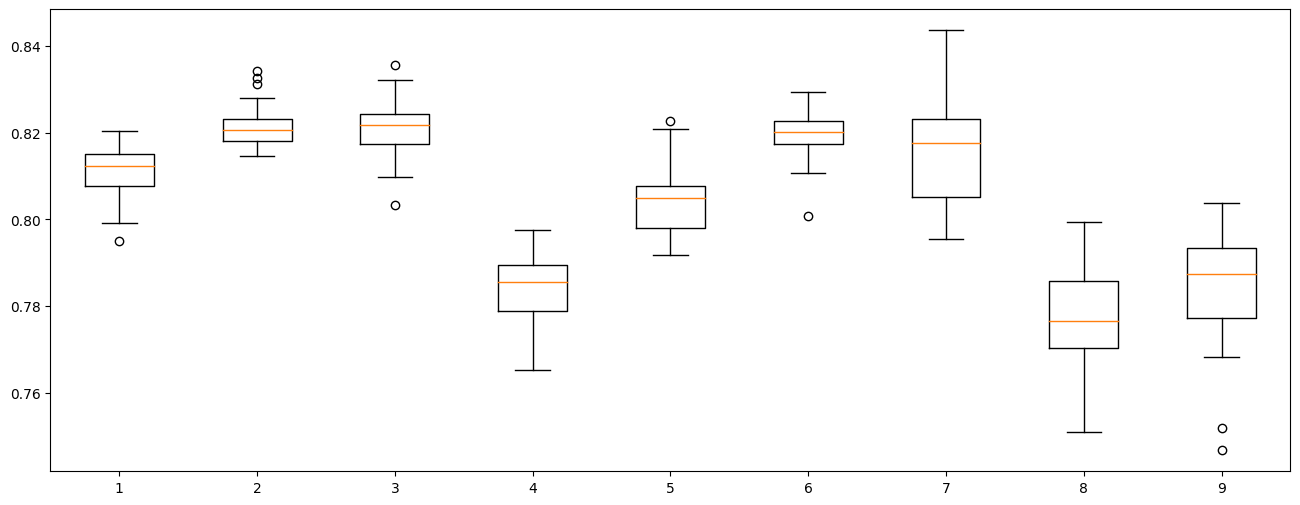

In [7]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [8]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

1.8758272196988162e-06

In [9]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[2])
p_val

0.5864198816077929

In [10]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[3])
p_val

3.342591554197399e-18

In [11]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[4])
p_val

5.611345967124964e-09

In [12]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[5])
p_val

0.20045842613913603

In [13]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[6])
p_val

0.07801242570393785

In [14]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[7])
p_val

2.2664772108456553e-16

In [15]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[8])
p_val

1.9197561795361594e-13

#Adam 0.001 TopResult